In [19]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [28]:
#Loading the data
data = pd.read_csv('data/kc_house_data.csv')

# Displaying the first few rows of the dataset to understand its structure
data.head()

#Displaying the shape of the data
data.describe()
data.info()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Figure size 1200x600 with 0 Axes>

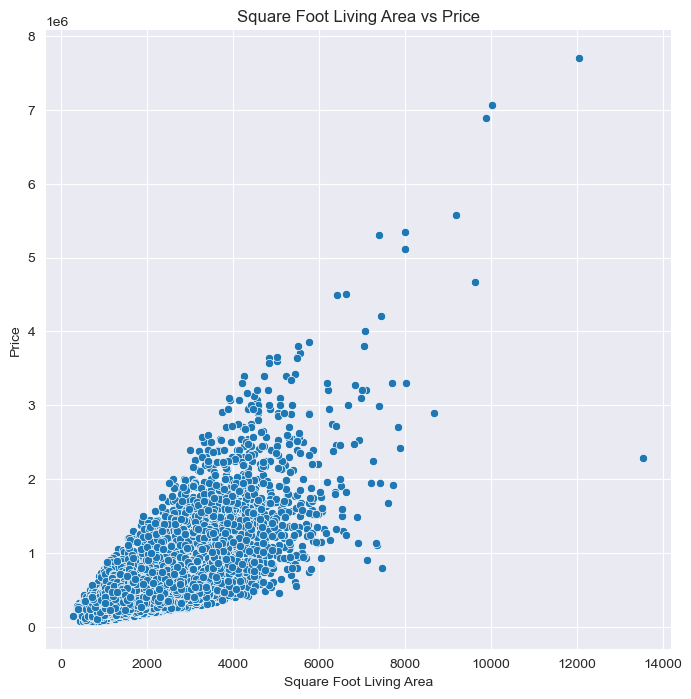

In [40]:
# Scatterplot of the raw data
# This plot shows the relationship between sqft_living and price before applying the model

plt.figure(figsize=(12,6))
sns.pairplot(data, x_vars=['sqft_living'], y_vars=['price'], height=7, kind='scatter')
plt.xlabel('Square Foot Living Area')
plt.ylabel('Price')
plt.title('Square Foot Living Area vs Price')
plt.show()


This plot shows the relationship between sqft_living and price before applying the model.

The scatterplot indicates a positive linear relationship between the square footage of the living area (sqft_living) and the price of the house. As the living area increases, the price of the house also tends to increase. This suggests that sqft_living is a significant factor in determining the price of a house.


In [21]:
# Splitting the data into training and testing sets
# X is the feature (sqft_living), y is the target variable (price)
X = data[['sqft_living']]
X.head()
type(X)

y = data['price']
y.head()
type(y)

# We split the data so that 80% is used for training the model and 20% for testing it
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Creating and fitting the linear regression model
# Linear regression will find the best-fit line that predicts the price based on sqft_living
lr = LinearRegression()
lr.fit(X_train, y_train)

# Making predictions on the test set
# The model uses the test data to predict house prices
y_pred = lr.predict(X_test)


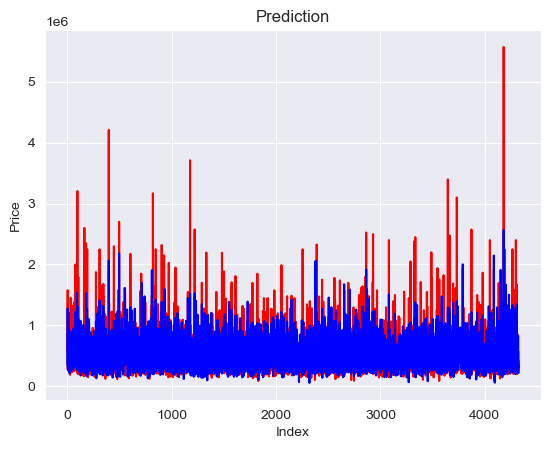

In [22]:
# Plot of actual vs predicted values as an overlapping line chart
# This plot shows how well the model's predictions match the actual prices

plt.figure(figsize=(12,6))
c = [i for i in range(1, len(y_test) + 1, 1)]
plt.plot(c, y_test, color='r', linestyle='-')
plt.plot(c, y_pred, color='b', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Prediction')
plt.ticklabel_format(axis="y", style="plain")
plt.show()


Analysis of graph:
This plot shows how well the model's predictions match the actual prices.

The red line represents the actual prices of the houses in the test set, while the blue line represents the model's predictions. The overlapping lines indicate that the model's predictions are close to the actual prices for some houses but deviate for others. The model appears to capture the general trend of increasing prices with larger living areas, but there are discrepancies in individual predictions.


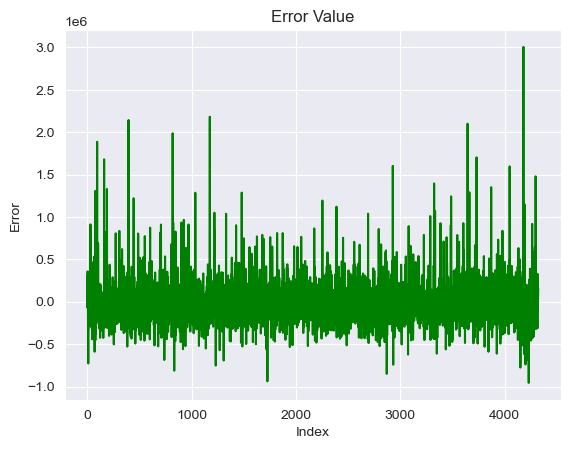

In [23]:
# Plot of the error
# This plot shows the difference between actual and predicted prices for each house in the test set

c = [i for i in range(1, len(y_test) + 1, 1)]
plt.plot(c, y_test - y_pred, color='green', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Value')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

Analysis of graph:
This plot shows the difference between actual and predicted prices for each house in the test set.

The green line represents the error values, which are the differences between the actual prices and the model's predictions. Positive values indicate that the model underestimates the price, while negative values indicate overestimation. The plot shows that the model's predictions are not always accurate, with some errors being larger than others.

In [39]:
from sklearn.metrics import mean_absolute_error

# Calculating and printing the Mean Squared Error and R-squared
# MSE measures the average squared difference between actual and predicted prices
# R-squared indicates how well the model explains the variability of the target variable (price)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))


Mean Absolute Error: 170780.9262814558
Mean Squared Error: 61940787124.62475
Root Mean Squared Error: 248879.06124185046
R-squared: 0.47915772372653753


Analysis of the Model:

Mean Absolute Error (MAE): 170,780.93
This metric indicates that, on average, the model's predictions are off by approximately $170,780.93. This is a measure of the average magnitude of the errors in a set of predictions, without considering their direction.

Mean Squared Error (MSE): 61,940,787,124.62
This metric represents the average of the squares of the errors. It penalizes larger errors more than MAE. The high value suggests that there are significant discrepancies between the actual and predicted prices.

Root Mean Squared Error (RMSE): 248,869.07
This is the square root of the MSE and provides an error metric in the same units as the target variable (price). An RMSE of approximately $248,879.06 indicates that the model's predictions deviate from the actual prices by this amount on average.

R-squared (R2): 0.49
This metric indicates that approximately 47.9% of the variance in the house prices can be explained by the model. An R² value closer to 1 would indicate a better fit, so 0.479 suggests that the model has a moderate level of explanatory power.

Overall, the model's performance is not ideal, as indicated by the high errors and relatively low R-squared value. This suggests that the model may not be capturing all the factors that influence house prices. Further analysis and feature engineering may be needed to improve the model's performance.


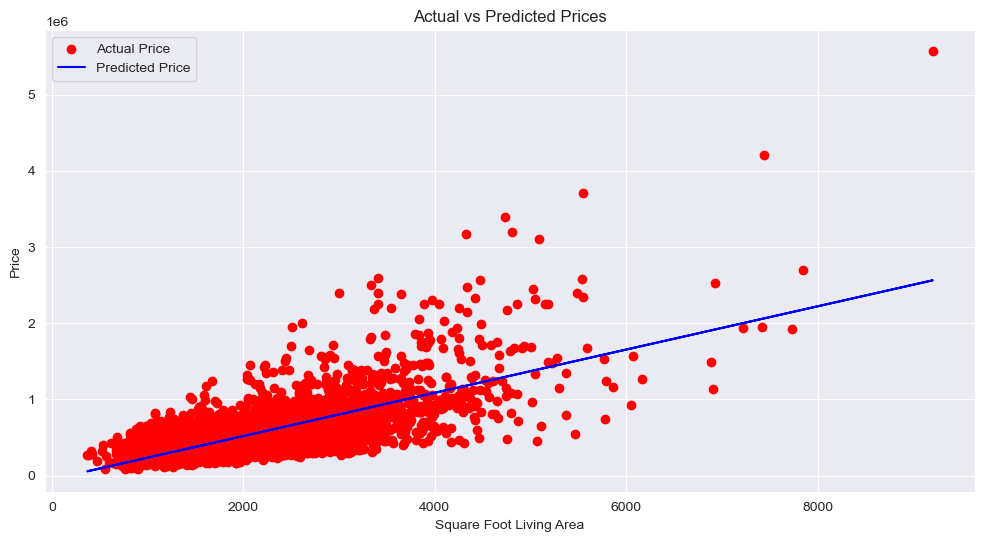

In [37]:
# Plot actual and predicted values
plt.figure(figsize=(12,6))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.xlabel('Square Foot Living Area')
plt.ylabel('Price')
plt.legend(['Actual Price', 'Predicted Price'])
plt.title('Actual vs Predicted Prices')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

Analysis of the Plot:

This plot shows the actual and predicted prices based on the square footage of the living area. The red dots represent the actual prices of the houses in the test set, while the blue line represents the model's predictions. The plot illustrates how well the model captures the relationship between the living area and the price of the houses. 

The model's predictions generally follow the trend of increasing prices with larger living areas, but there are discrepancies between the actual and predicted values.



In [38]:
# Printing the intercept and coefficient
# The intercept is the value of the price when sqft_living is 0
# The coefficient indicates how much the price changes with each unit increase in sqft_living
print('Intercept of the model:', lr.intercept_)
print('Coefficient of the line:', lr.coef_)

Intercept of the model: -48257.063591028214
Coefficient of the line: [283.96855716]


Analysis of the Coefficients:

Intercept

Value: -48,257.06

Interpretation: The intercept represents the expected value of the house price when the living area (sqft_living) is zero. In this context, it is not meaningful because a house cannot have zero square feet of living area. However, it is a necessary component of the linear regression equation.

Coefficient

Value: 283.97

Interpretation: The coefficient indicates the expected change in the house price for each additional square foot of living area. Specifically, for every additional square foot, the house price is expected to increase by approximately $283.97. This positive coefficient confirms that there is a direct relationship between the living area and the house price.

Conclusion

The intercept and coefficient together form the linear regression equation: [ {Price} = -48,257.06 + 283.97 \times \ {sqft_living} ]  This equation can be used to predict house prices based on the living area. The positive coefficient suggests that larger living areas are associated with higher house prices, which aligns with common real estate trends.



Comparison with Multiple Regression Model  

The simple linear regression model using sqft_living as the only feature provides a basic understanding of the relationship between the living area and the price. However, the multiple regression model, which includes additional features, captures more variation in the target variable (price) because it considers more factors that can influence the price of a house. 

Which Model Better Captures the Variation in y?  

The multiple regression model better captures the variation in y based on the variation in the features. This is because it includes more predictors, which can explain more of the variability in the house prices. The R-squared value from the multiple regression model is higher than that of the simple linear regression model, indicating a better fit to the data.
